In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools
import collections
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
sns.set()

# 1 Read Data

In [2]:
df = pd.read_csv('movieReplicationSet_imputation.csv')
#Read data that missing data already been handled by Data Preprocessing for Machine Learning Part.ipynb
df = df.apply(pd.to_numeric, errors = 'coerce')
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [3]:
#some basic settings for the data frame
N_user = 1097
N_movie = 400
movie_list = list(df)[0:N_movie] # get the list of movie name

In [4]:
# entry i of the list is the numpy array of score of movie i
movie_rating_list = []
for i in range(N_movie):
    movie_rating_list.append(np.array(df.iloc[:,i]))

# 2 Solve Problems

### Q1

For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings
of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have
to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that
predicts ratings the best. Then report the average COD of those 400 simple linear regression models.
Please include a histogram of these 400 COD values and a table with the 10 movies that are most
easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict
from the ratings of a single other movie

In [5]:
best_predictor_index_for_each_movie = []
max_COD_for_each_movie = []

for i in range(N_movie): # index of object movie
    COD_list = [0 for i in range(N_movie)] #record COD
    for j in range(N_movie): # index of current predictor movie
        if i == j:
            #we don't want to use a movie score to predict itself
            continue
        else: # i != j
            x = movie_rating_list[j]
            y = movie_rating_list[i]

            #here we set regression model to have No intercept
            reg = LinearRegression(fit_intercept=False).fit(x.reshape(-1,1), y)
            y_hat = reg.predict(x.reshape(-1,1)) #prediction
            COD = r2_score(y,y_hat)
            COD_list[j] = COD
        
    COD_list = np.array(COD_list)
    max_COD_index, max_COD = np.argmax(COD_list), np.max(COD_list)
    
    best_predictor_index_for_each_movie.append(max_COD_index)
    max_COD_for_each_movie.append(max_COD)

best_predictor_index_for_each_movie = np.array(best_predictor_index_for_each_movie)
max_COD_for_each_movie = np.array(max_COD_for_each_movie)

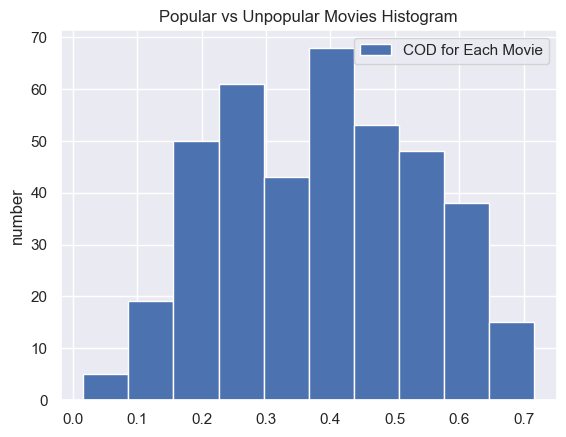

In [6]:
plt.hist(max_COD_for_each_movie, label = 'COD for Each Movie')
plt.ylabel("number")
plt.title('Popular vs Unpopular Movies Histogram')
plt.legend()
plt.show()

In [7]:
top_10_easiest_index = max_COD_for_each_movie.argsort()[-10:][::-1]
top_10_hardest_index = max_COD_for_each_movie.argsort()[:10]
top_10_easiest_index, top_10_hardest_index

(array([208, 203, 249, 395, 282, 377, 300, 346, 309, 334]),
 array([ 95,  80,   9,  84,  83, 207,  22,  55, 117, 190]))

In [8]:
max_COD_for_each_movie[top_10_easiest_index], max_COD_for_each_movie[top_10_hardest_index]

(array([0.71607602, 0.70585279, 0.70478768, 0.69763648, 0.690895  ,
        0.6809458 , 0.68053748, 0.67496361, 0.67100076, 0.66864504]),
 array([0.01653771, 0.06377888, 0.06874449, 0.07126314, 0.08215848,
        0.10988935, 0.1125078 , 0.11651829, 0.12108937, 0.1272223 ]))

In [9]:
df_top_10_easiest = pd.DataFrame(columns=['Movie Names', 'Associated COD', 'Best Predictor Movies'])
for i in top_10_easiest_index:
    movie_name = movie_list[i]
    associated_COD = max_COD_for_each_movie[i]
    best_predictor_movie_name = movie_list[best_predictor_index_for_each_movie[i]]
    df_top_10_easiest.loc[len(df_top_10_easiest.index)] = [movie_name, associated_COD, best_predictor_movie_name]

display(df_top_10_easiest)

,Movie Names,Associated COD,Best Predictor Movies
0,I.Q. (1994),0.716076,Erik the Viking (1989)
1,Erik the Viking (1989),0.705853,I.Q. (1994)
2,Best Laid Plans (1999),0.704788,The Bandit (1996)
3,Patton (1970),0.697636,The Lookout (2007)
4,Congo (1995),0.690895,The Straight Story (1999)
5,The Lookout (2007),0.680946,Patton (1970)
6,Ran (1985),0.680537,Heavy Traffic (1973)
7,FeardotCom (2002),0.674964,The Final Conflict (1981)
8,Heavy Traffic (1973),0.671001,The Final Conflict (1981)
9,The Final Conflict (1981),0.668645,The Lookout (2007)


In [10]:
df_top_10_hardest = pd.DataFrame(columns=['Movie Names', 'Associated COD', 'Best Predictor Movies'])
for i in top_10_hardest_index:
    movie_name = movie_list[i]
    associated_COD = max_COD_for_each_movie[i]
    best_predictor_movie_name = movie_list[best_predictor_index_for_each_movie[i]]
    df_top_10_hardest.loc[len(df_top_10_hardest.index)] = [movie_name, associated_COD, best_predictor_movie_name]

display(df_top_10_hardest)

,Movie Names,Associated COD,Best Predictor Movies
0,Interstellar (2014),0.016538,The Bandit (1996)
1,Avatar (2009),0.063779,Crimson Tide (1995)
2,Black Swan (2010),0.068744,The Bandit (1996)
3,The Conjuring (2013),0.071263,Cocktail (1988)
4,Fight Club (1999),0.082158,A Perfect Murder (1998)
5,Forrest Gump (1994),0.109889,Cocktail (1988)
6,The Silence of the Lambs (1991),0.112508,Miller's Crossing (1990)
7,Clueless (1995),0.116518,Escape from LA (1996)
8,Shutter Island (2010),0.121089,Miller's Crossing (1990)
9,The Cabin in the Woods (2012),0.127222,The Bandit (1996)


### Q2

For the 10 movies that are best and least well predicted from the ratings of a single other movie (so
20 in total), build multiple regression models that include gender identity (column 475), sibship status
(column 476) and social viewing preferences (column 477) as additional predictors (in addition to the
best predicting movie from question 1). Comment on how R^2 has changed relative to the answers
in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear
regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple
regression models) is on the y-axis.

In [11]:
#because answers are categorical data, we apply onehot encoding to get dummies
gender_onehot = pd.get_dummies(df['Gender identity (1 = female; 2 = male; 3 = self-described)']).to_numpy()
sibship_onehot = pd.get_dummies(df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']).to_numpy()
social_viewing_onehot = pd.get_dummies(df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']).to_numpy()

add new predictors to top 10 easiest movies

In [12]:
#add new predictor to top 10 easiest
mutiple_regression_COD_list_easiest = []
for i in top_10_easiest_index:
    x1 = movie_rating_list[best_predictor_index_for_each_movie[i]].reshape(-1, 1) #best single movie predictor
    x2 = gender_onehot.reshape(-1, 3) #gender predictor
    x3 = sibship_onehot.reshape(-1, 3) #sibship predictor
    x4 = social_viewing_onehot.reshape(-1, 3) #social viewing predictor

    x = np.concatenate((x1, x2, x3, x4), axis=1)
    y = movie_rating_list[i]

    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    mutiple_regression_COD_list_easiest.append(COD)

mutiple_regression_COD_list_easiest = np.array(mutiple_regression_COD_list_easiest)
mutiple_regression_COD_list_easiest

array([0.73231804, 0.73353077, 0.7129878 , 0.71500476, 0.70138935,
       0.71602964, 0.69340782, 0.69233151, 0.68891169, 0.70260211])

In [13]:
df_top_10_easiest_COD_changed = pd.DataFrame(columns=['Movie Names', 'Old COD', 'New COD', 'Increase Proportion'])
count = 0
for i in top_10_easiest_index:
    movie_name = movie_list[i]
    old_COD = max_COD_for_each_movie[i]
    new_COD = mutiple_regression_COD_list_easiest[count]
    increased_proportion = '{:.2%}'.format((new_COD - old_COD)/old_COD)
    df_top_10_easiest_COD_changed.loc[len(df_top_10_easiest_COD_changed.index)] = [movie_name, old_COD, new_COD, increased_proportion]
    count += 1
display(df_top_10_easiest_COD_changed)

,Movie Names,Old COD,New COD,Increase Proportion
0,I.Q. (1994),0.716076,0.732318,2.27%
1,Erik the Viking (1989),0.705853,0.733531,3.92%
2,Best Laid Plans (1999),0.704788,0.712988,1.16%
3,Patton (1970),0.697636,0.715005,2.49%
4,Congo (1995),0.690895,0.701389,1.52%
5,The Lookout (2007),0.680946,0.716030,5.15%
6,Ran (1985),0.680537,0.693408,1.89%
7,FeardotCom (2002),0.674964,0.692332,2.57%
8,Heavy Traffic (1973),0.671001,0.688912,2.67%
9,The Final Conflict (1981),0.668645,0.702602,5.08%


add new predictors to top 10 hardest movies

In [14]:
#add new predictor to top 10 hardest
mutiple_regression_COD_list_hardest = []
for i in top_10_hardest_index:
    x1 = movie_rating_list[best_predictor_index_for_each_movie[i]].reshape(-1, 1) #best single movie predictor
    x2 = gender_onehot.reshape(-1, 3) #gender predictor
    x3 = sibship_onehot.reshape(-1, 3) #sibship predictor
    x4 = social_viewing_onehot.reshape(-1, 3) #social viewing predictor

    x = np.concatenate((x1, x2, x3, x4), axis=1)
    y = movie_rating_list[i]

    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    mutiple_regression_COD_list_hardest.append(COD)

mutiple_regression_COD_list_hardest = np.array(mutiple_regression_COD_list_hardest)
mutiple_regression_COD_list_hardest

array([0.10988565, 0.08196415, 0.11475126, 0.09781405, 0.19663395,
       0.16477855, 0.1790369 , 0.14907646, 0.18941804, 0.14904016])

In [15]:
df_top_10_hardest_COD_changed = pd.DataFrame(columns=['Movie Names', 'Old COD', 'New COD', 'Increase Proportion'])
count = 0
for i in top_10_hardest_index:
    movie_name = movie_list[i]
    old_COD = max_COD_for_each_movie[i]
    new_COD = mutiple_regression_COD_list_hardest[count]
    increased_proportion = '{:.2%}'.format((new_COD - old_COD)/old_COD)
    df_top_10_hardest_COD_changed.loc[len(df_top_10_hardest_COD_changed.index)] = [movie_name, old_COD, new_COD, increased_proportion]
    count += 1
display(df_top_10_hardest_COD_changed)

,Movie Names,Old COD,New COD,Increase Proportion
0,Interstellar (2014),0.016538,0.109886,564.46%
1,Avatar (2009),0.063779,0.081964,28.51%
2,Black Swan (2010),0.068744,0.114751,66.92%
3,The Conjuring (2013),0.071263,0.097814,37.26%
4,Fight Club (1999),0.082158,0.196634,139.33%
5,Forrest Gump (1994),0.109889,0.164779,49.95%
6,The Silence of the Lambs (1991),0.112508,0.179037,59.13%
7,Clueless (1995),0.116518,0.149076,27.94%
8,Shutter Island (2010),0.121089,0.189418,56.43%
9,The Cabin in the Woods (2012),0.127222,0.149040,17.15%


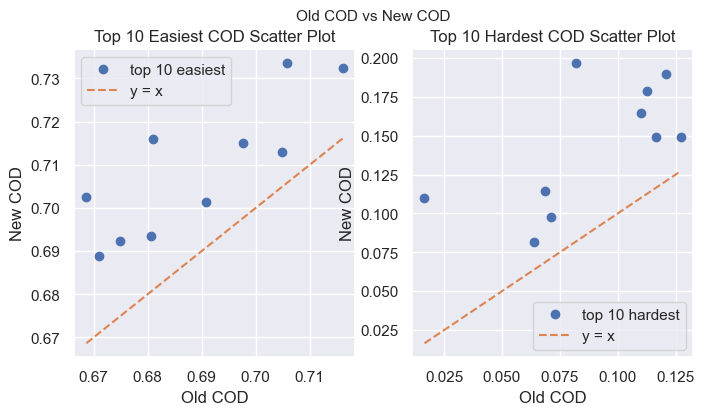

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle("Old COD vs New COD", fontsize=11)
ax[0].plot(df_top_10_easiest_COD_changed['Old COD'], df_top_10_easiest_COD_changed['New COD'], 'o', label = 'top 10 easiest')
ax[0].plot(df_top_10_easiest_COD_changed['Old COD'], df_top_10_easiest_COD_changed['Old COD'], '--', label = 'y = x')
ax[0].set_xlabel("Old COD")
ax[0].set_ylabel('New COD')
ax[0].set_title('Top 10 Easiest COD Scatter Plot')
ax[0].legend()

ax[1].plot(df_top_10_hardest_COD_changed['Old COD'], df_top_10_hardest_COD_changed['New COD'], 'o', label = 'top 10 hardest')
ax[1].plot(df_top_10_hardest_COD_changed['Old COD'], df_top_10_hardest_COD_changed['Old COD'], '--',label = 'y = x')
ax[1].set_xlabel("Old COD")
ax[1].set_ylabel('New COD')
ax[1].set_title('Top 10 Hardest COD Scatter Plot')
ax[1].legend()

plt.show()

### Q3

Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in
question 2). Now build a regularized regression model with the ratings from 10 other movies (picked
randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do
suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a
table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you
find by doing so.

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import time

In [34]:
middle_30_index = max_COD_for_each_movie.argsort()[185:215] #index of 30 movies we pick
pre_selected_index = random.sample(range(0, 400), 40)
predictor_index = [] #index of 10 movies as predictor

#Below procedure makes sure our predictor index != 30 movie index (target)
count = 0
for i in pre_selected_index:
    if count == 10:
        break
    if i not in middle_30_index:
        predictor_index.append(i)
        count += 1

predictor_index = np.array(predictor_index)
predictors_rating_list = [movie_rating_list[i].reshape(-1, 1) for i in predictor_index]
print('index of 30 movies we choose:', middle_30_index)
print('index of 10 movies as predictors:', predictor_index)

index of 30 movies we choose: [290 323 302 366 150  76 336 305  20 296 145   8 338 131 212  62  19 339
 132  70 193 221  96 313 222 226 327  78 164  11]
index of 10 movies as predictors: [319 160 169 106 120 324 329 357 398 388]


In [37]:
#try to find best learning rate alpha
sum_train_RMSE_list = []
sum_train_COD_list = []
sum_test_RMSE_list = []
sum_test_COD_list = []
sum_run_time_list = []

#range of regularization strength
alpha_choice_range = np.arange(0, 150, 1)

for alpha_choice in alpha_choice_range:
    #for each loop, we have different regularization strength alpha
    train_RMSE_list = []
    train_COD_list = []
    test_RMSE_list = []
    test_COD_list = []
    run_time_list = []

    start_time = time.time()

    for i in middle_30_index:
    #for each loop, we have different target movie to predict
        for repeat_experiment_index in range(10):
        #for each loop, we have different random state to do the train, test split
            x = np.concatenate(predictors_rating_list, axis=1)
            y = movie_rating_list[i]
            X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state = repeat_experiment_index + 10)
            reg = Ridge(fit_intercept=False, alpha = alpha_choice).fit(X_train, Y_train)

            Y_train_prediction = reg.predict(X_train)
            train_COD_list.append(r2_score(Y_train,Y_train_prediction))
            train_RMSE_list.append(np.sqrt(np.mean(np.sum((Y_train-Y_train_prediction)**2))))
            
            Y_test_prediction = reg.predict(X_test)
            test_COD_list.append(r2_score(Y_test,Y_test_prediction))
            test_RMSE_list.append(np.sqrt(np.mean(np.sum((Y_test-Y_test_prediction)**2))))
    
    end_time = time.time()
    
    sum_train_RMSE_list.append(sum(train_RMSE_list))
    sum_train_COD_list.append(sum(train_COD_list))
    sum_test_RMSE_list.append(sum(test_RMSE_list))
    sum_test_COD_list.append(sum(test_RMSE_list))
    sum_run_time_list.append(end_time - start_time)


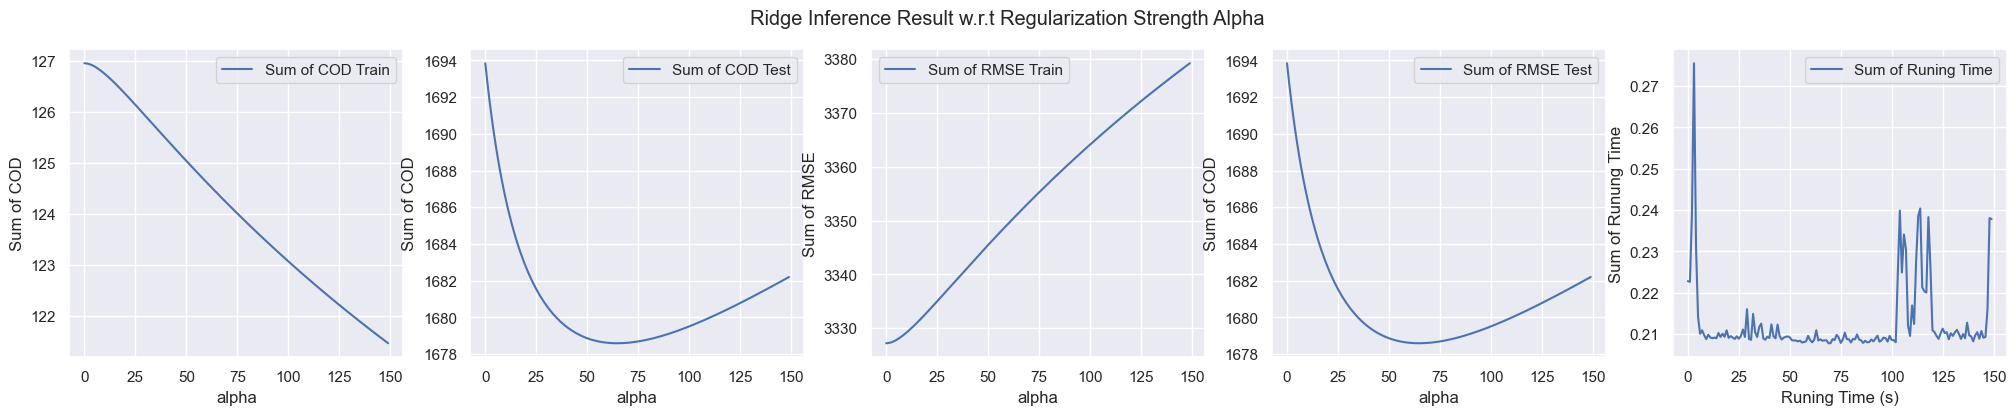

In [38]:
fig, ax = plt.subplots(1, 5, figsize = (25, 4))
fig.suptitle('Ridge Inference Result w.r.t Regularization Strength Alpha')

ax[0].plot(alpha_choice_range,  sum_train_COD_list, label = 'Sum of COD Train')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('Sum of COD')
ax[0].legend()

ax[1].plot(alpha_choice_range,  sum_test_COD_list, label = 'Sum of COD Test')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('Sum of COD')
ax[1].legend()

ax[2].plot(alpha_choice_range, sum_train_RMSE_list, label = 'Sum of RMSE Train')
ax[2].set_xlabel('alpha')
ax[2].set_ylabel('Sum of RMSE')
ax[2].legend()

ax[3].plot(alpha_choice_range,  sum_test_RMSE_list, label = 'Sum of RMSE Test')
ax[3].set_xlabel('alpha')
ax[3].set_ylabel('Sum of COD')
ax[3].legend()

ax[4].plot(alpha_choice_range,  sum_run_time_list, label = 'Sum of Runing Time')
ax[4].set_xlabel('Runing Time (s)')
ax[4].set_ylabel('Sum of Runung Time')
ax[4].legend()

In [42]:
best_alpha_ridge = alpha_choice_range[sum_test_RMSE_list.index(min(sum_test_RMSE_list))]
best_alpha_ridge

65

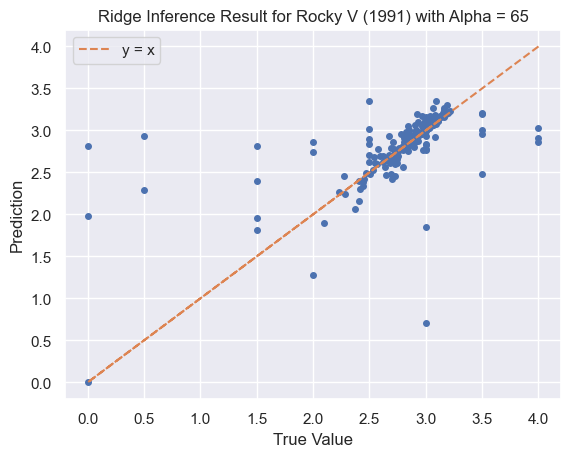

In [55]:
RMSE_list = []
COD_list = []
coef_list = []

for i in middle_30_index:
    x = np.concatenate(predictors_rating_list, axis=1)
    y = movie_rating_list[i]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2)
    reg = Ridge(fit_intercept=False, alpha = best_alpha_ridge).fit(X_train, Y_train)
    coef_list.append(reg.coef_)
    Y_hat_test = reg.predict(X_test)
    COD = r2_score(Y_test,Y_hat_test)
    rmse = np.sqrt(np.mean(np.sum((Y_test-Y_hat_test)**2)))
    COD_list.append(COD)
    RMSE_list.append(rmse)

    if i == middle_30_index[0]:
        plt.title('Ridge Inference Result for ' + movie_list[middle_30_index[0]] + ' with Alpha = ' + str(best_alpha_ridge))
        plt.plot(Y_test, Y_hat_test, 'o', ms = 4)
        plt.plot(Y_test, Y_test,'--', ms = 0.5, label = 'y = x')
        plt.xlabel('True Value')
        plt.ylabel('Prediction')
        plt.legend()

In [ ]:
coef_list

### Q4 

Repeat question 3) with LASSO regression. Again, make sure to comment on the hyperparameters
you use and betas you find by doing so. 

In [45]:
from sklearn.linear_model import Lasso

In [46]:
#try to find best learning rate alpha
sum_train_RMSE_list = []
sum_train_COD_list = []
sum_test_RMSE_list = []
sum_test_COD_list = []
sum_run_time_list = []

#range of regularization strength
alpha_choice_range = np.arange(0.000001, 0.05, 0.0005)

for alpha_choice in alpha_choice_range:
    #for each loop, we have different regularization strength alpha
    train_RMSE_list = []
    train_COD_list = []
    test_RMSE_list = []
    test_COD_list = []
    run_time_list = []

    start_time = time.time()

    for i in middle_30_index:
    #for each loop, we have different target movie to predict
        for repeat_experiment_index in range(10):
        #for each loop, we have different random state to do the train, test split
            x = np.concatenate(predictors_rating_list, axis=1)
            y = movie_rating_list[i]
            X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state = repeat_experiment_index + 10)
            reg = Lasso(fit_intercept=False, alpha = alpha_choice).fit(X_train, Y_train);

            Y_train_prediction = reg.predict(X_train)
            train_COD_list.append(r2_score(Y_train,Y_train_prediction))
            train_RMSE_list.append(np.sqrt(np.mean(np.sum((Y_train-Y_train_prediction)**2))))
            
            Y_test_prediction = reg.predict(X_test)
            test_COD_list.append(r2_score(Y_test,Y_test_prediction))
            test_RMSE_list.append(np.sqrt(np.mean(np.sum((Y_test-Y_test_prediction)**2))))

            # print('when alpha = ', alpha_choice, 'test RMSE: ', np.sqrt(np.mean(np.sum((Y_test-Y_test_prediction)**2))))
    
    end_time = time.time()
    
    sum_train_RMSE_list.append(sum(train_RMSE_list))
    sum_train_COD_list.append(sum(train_COD_list))
    sum_test_RMSE_list.append(sum(test_RMSE_list))
    sum_test_COD_list.append(sum(test_RMSE_list))
    sum_run_time_list.append(end_time - start_time)

/var/folders/ts/xc6_h0kd5nv7gws_x4n04jwr0000gn/T/ipykernel_19600/998219449.py:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg = Lasso(fit_intercept=False, alpha = alpha_choice).fit(X_train, Y_train);
/Users/zhanghanyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/zhanghanyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.459e+01, tolerance: 7.164e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

In [47]:
best_alpha_lasso = alpha_choice_range[sum_test_RMSE_list.index(min(sum_test_RMSE_list))]
best_alpha_lasso

0.0085

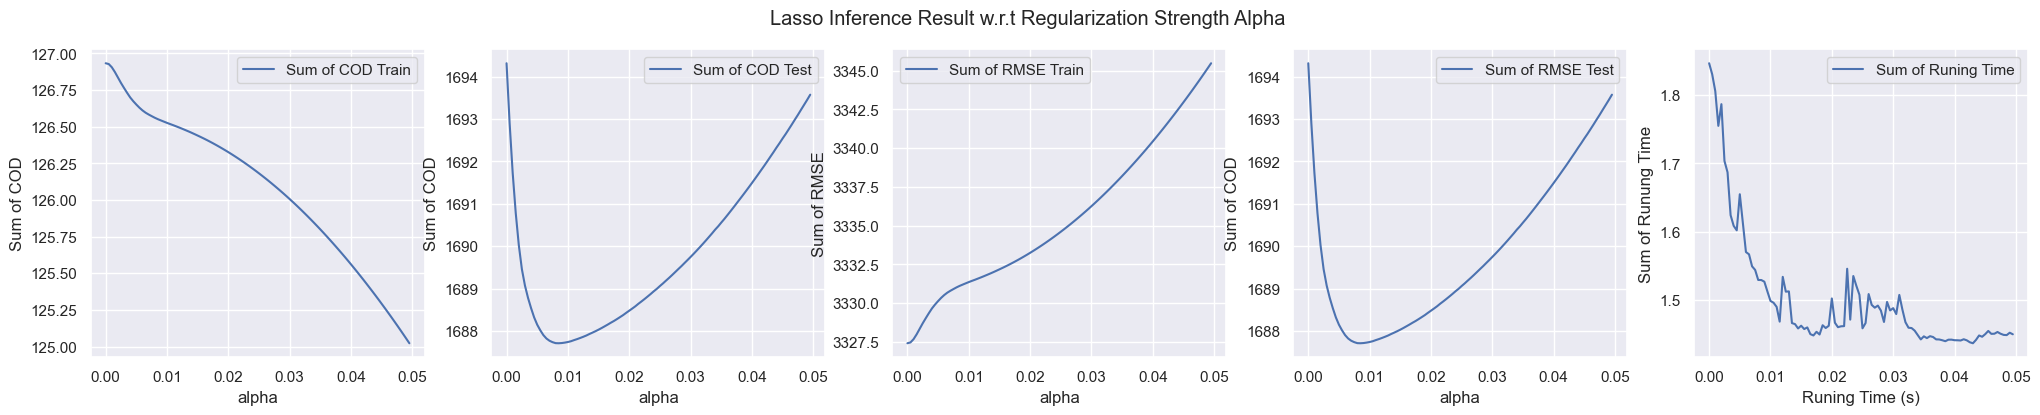

In [48]:
fig, ax = plt.subplots(1, 5, figsize = (25, 4))
fig.suptitle('Lasso Inference Result w.r.t Regularization Strength Alpha')

ax[0].plot(alpha_choice_range,  sum_train_COD_list, label = 'Sum of COD Train')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('Sum of COD')
ax[0].legend()

ax[1].plot(alpha_choice_range,  sum_test_COD_list, label = 'Sum of COD Test')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('Sum of COD')
ax[1].legend()

ax[2].plot(alpha_choice_range, sum_train_RMSE_list, label = 'Sum of RMSE Train')
ax[2].set_xlabel('alpha')
ax[2].set_ylabel('Sum of RMSE')
ax[2].legend()

ax[3].plot(alpha_choice_range,  sum_test_RMSE_list, label = 'Sum of RMSE Test')
ax[3].set_xlabel('alpha')
ax[3].set_ylabel('Sum of COD')
ax[3].legend()

ax[4].plot(alpha_choice_range,  sum_run_time_list, label = 'Sum of Runing Time')
ax[4].set_xlabel('Runing Time (s)')
ax[4].set_ylabel('Sum of Runung Time')
ax[4].legend()

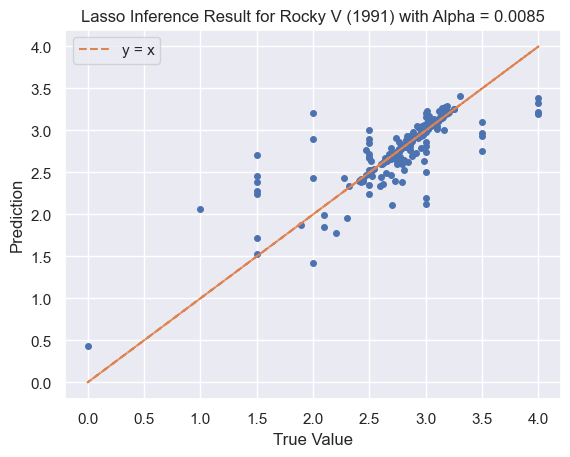

In [56]:
#compare
RMSE_list = []
COD_list = []
coef_list = []

for i in middle_30_index:
    x = np.concatenate(predictors_rating_list, axis=1)
    y = movie_rating_list[i]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2)
    reg = Ridge(fit_intercept=False, alpha = best_alpha_lasso).fit(X_train, Y_train)
    coef_list.append(reg.coef_)
    Y_hat_test = reg.predict(X_test)
    COD = r2_score(Y_test,Y_hat_test)
    rmse = np.sqrt(np.mean(np.sum((Y_test-Y_hat_test)**2)))
    COD_list.append(COD)
    RMSE_list.append(rmse)

    if i == middle_30_index[0]:
        plt.title('Lasso Inference Result for ' + movie_list[middle_30_index[0]] + ' with Alpha = ' + str(best_alpha_lasso))
        plt.plot(Y_test, Y_hat_test, 'o', ms = 4)
        plt.plot(Y_test, Y_test,'--', ms = 0.5, label = 'y = x')
        plt.xlabel('True Value')
        plt.ylabel('Prediction')
        plt.legend()

In [ ]:
coef_list

### Q5

Compute the average movie enjoyment for each user (using only real, non-imputed data). Use these
averages as the predictor variable X in a logistic regression model. Sort the movies order of increasing
rating (also using only real, non-imputed data). Now pick the 4 movies in the middle of the score range
as your target movie. For each of them, do a media split (now using the imputed data) of ratings to
code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median
with the label 0 (= not enjoyed). For each of these movies, build a logistic regression model (using X
to predict Y), show figures with the outcomes and report the betas as well as the AUC values.
Comment on the quality of your models. Make sure to use cross-validation methods to avoid
overfitting.

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [58]:
df_original = pd.read_csv('movieReplicationSet.csv')
#Read original data
df_original = df_original.apply(pd.to_numeric, errors = 'coerce')

In [75]:
#get a mean rating for each movie
each_movie_rating_mean = [] #ith entry represents avg rating of movie i
for i in range(N_movie):
    current_movie_mean = df_original.iloc[:,i].mean()
    each_movie_rating_mean.append(current_movie_mean)
each_movie_rating_mean = np.array(each_movie_rating_mean)
each_movie_rating_mean.shape

(400,)

In [92]:
#get a mean rating for each user
each_user_rating_mean = [] #ith entry represents avg rating of user i
for i in range(N_user):
    current_user_mean = df_original.iloc[i,:400].mean()
    if not np.isnan(current_user_mean):
        each_user_rating_mean.append(current_user_mean)
    else:
        each_user_rating_mean.append(2)
each_user_rating_mean = np.array(each_user_rating_mean)
each_user_rating_mean.shape

(1097,)

In [93]:
avg_movie_rating_ascending_index = each_movie_rating_mean.argsort() #index of movie in ascending rating order
pick_4_index = avg_movie_rating_ascending_index[198:202] #pick 4 in the middle

In [116]:
x = each_user_rating_mean.reshape(-1, 1)
y_label_for_4_movie = []
y_predictions_prob_for_4_movie = []
coef_list = []
for i in pick_4_index:
    #build y label
    y_label = []
    current_movie_ratings = movie_rating_list[i]
    median_of_current_movie_rating = np.median(current_movie_ratings)
    for user_j in range(N_user):
        if current_movie_ratings[user_j] >= median_of_current_movie_rating: #if > median,  label 1 (= enjoyed)
            y_label.append(1)
        else: # label 0 (= not enjoyed)
            y_label.append(0)
    y_label = np.array(y_label)

    #start with logistic regression
    clf = LogisticRegression(random_state=0).fit(x, y_label)
    y_predictions_class = clf.predict(x)
    y_predictions_prob = clf.predict_proba(x)

    y_predictions_prob_for_4_movie.append(y_predictions_prob)
    y_label_for_4_movie.append(y_label)
    coef_list.append(clf.coef_)
    
    auc_score = roc_auc_score(y_label, y_predictions_class)
    print(auc_score)

0.9489516439977131
0.8823940010370548
0.9416490500312447
0.845925903766636


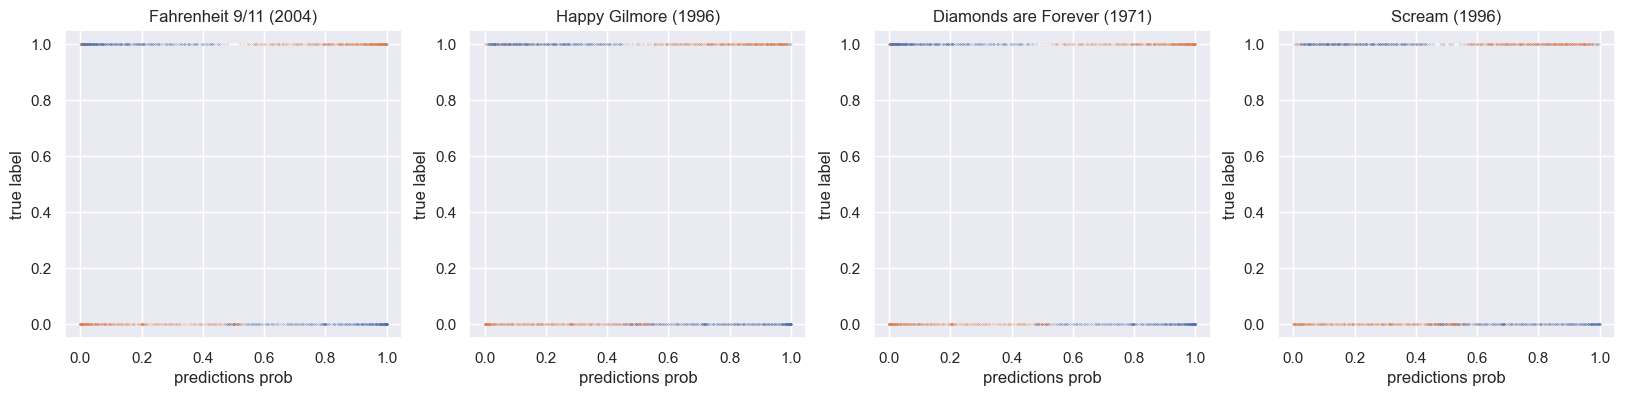

In [125]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
for i in range(4):
    ax[i].plot(y_predictions_prob_for_4_movie[i], y_label_for_4_movie[i], 'o', ms = 0.1)
    ax[i].set_xlabel('predictions prob')
    ax[i].set_ylabel('true label')
    ax[i].set_title(movie_list[pick_4_index[i]])

In [103]:
coef_list

[array([ 0.00246441,  0.14781232,  0.1755786 ,  0.10445018, -0.02468308,
         0.30050603,  0.12479719,  0.01659486,  0.15572133,  0.01833209]),
 array([-0.02523822, -0.01833486,  0.09403529,  0.37140529,  0.14676752,
         0.13542835,  0.10464013,  0.04411805,  0.16673882,  0.08033768]),
 array([-0.00279394,  0.03308454,  0.13617003,  0.10204794,  0.09466294,
         0.12523509, -0.00535322,  0.05365722,  0.25308508,  0.25137794]),
 array([ 0.06926764, -0.04161935,  0.12593089,  0.37316878, -0.01031417,
         0.05047706,  0.06465462,  0.11042171,  0.23090673,  0.10167213]),
 array([ 0.02247504,  0.05993131,  0.27700495,  0.2457495 ,  0.09472508,
         0.00575914, -0.05367516,  0.04213565,  0.3957791 , -0.03563281]),
 array([ 0.0098795 ,  0.01083315,  0.06204373,  0.48147636,  0.1629584 ,
         0.06402822,  0.01180569,  0.06266161, -0.12700711,  0.1992169 ]),
 array([0.0226953 , 0.08035039, 0.08905795, 0.10041207, 0.0263277 ,
        0.11565563, 0.18441493, 0.0561048 , 

### Extra Credict

In [218]:
from itertools import chain

In [225]:
index_IQ = movie_list.index('I.Q. (1994)')

In [241]:
#get COD with each of the single movie predictor
index_IQ = movie_list.index('I.Q. (1994)')
COD_list = [0 for i in range(N_movie)]

y = movie_rating_list[index_IQ] #ratings of I.Q. (1994)
for i in range(N_movie):
    if i != index_IQ:
        x = movie_rating_list[i]
        reg = LinearRegression(fit_intercept=False).fit(x.reshape(-1,1), y)
        y_hat = reg.predict(x.reshape(-1,1)) #prediction
        COD = r2_score(y,y_hat)
        COD_list[i] = COD
COD_list = np.array(COD_list)

In [313]:
N_predictors = 60
#find best N movie predictor of IQ
best_N_predictors_index = COD_list.argsort()[- N_predictors:][::-1]
best_N_COD_value = [COD_list[i] for i in best_N_predictors_index]


#find worst N movie predictor of IQ
worst_N_predictors_index = COD_list.argsort()[:N_predictors]
worst_N_COD_value = [COD_list[i] for i in worst_N_predictors_index]

In [314]:
y = movie_rating_list[index_IQ]
accumulative_COD_list_best = []
accumulative_COD_list_worst = []

for i in range(N_predictors): 
    x = movie_rating_list[best_N_predictors_index[0]].reshape(-1, 1)
    #for each loop add a new current best predictor
    for j in range(i):
        new_x = movie_rating_list[best_N_predictors_index[j]].reshape(-1, 1)
        x = np.concatenate((x, new_x), axis=1)

    #in the end, in the ith loop, we will have i + 1's predictor
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    accumulative_COD_list_best.append(COD)

for i in range(N_predictors):
    x = movie_rating_list[worst_N_predictors_index[0]].reshape(-1, 1)
    for j in range(i):
        new_x = movie_rating_list[worst_N_predictors_index[j]].reshape(-1, 1)
        x = np.concatenate((x, new_x), axis=1)

    #in the end, in the ith loop, we will have i + 1's predictor
    reg = LinearRegression(fit_intercept=False).fit(x, y)
    y_hat = reg.predict(x) #prediction
    COD = r2_score(y,y_hat)
    accumulative_COD_list_worst.append(COD)

accumulative_COD_list_best = np.array(accumulative_COD_list_best)
accumulative_COD_list_worst = np.array(accumulative_COD_list_worst)

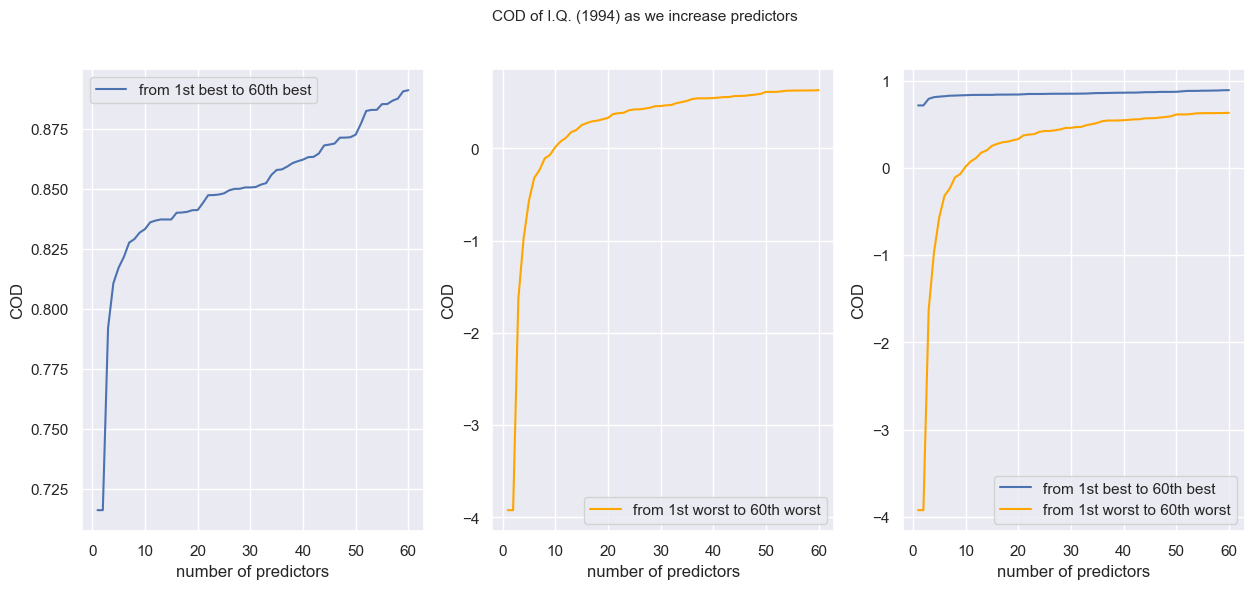

In [315]:
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('COD of I.Q. (1994) as we increase predictors', fontsize=11)
x_range = np.arange(1, N_predictors + 1)

ax[0].plot(x_range, accumulative_COD_list_best, '-', label = 'from 1st best to ' + str(N_predictors) +'th best')
ax[0].set_xlabel('number of predictors')
ax[0].set_ylabel('COD')
ax[0].legend()

ax[1].plot(x_range, accumulative_COD_list_worst, '-', label = 'from 1st worst to ' + str(N_predictors) +'th worst', c = 'orange')
ax[1].set_xlabel('number of predictors')
ax[1].set_ylabel('COD')
ax[1].legend()

ax[2].plot(x_range, accumulative_COD_list_best, '-', label = 'from 1st best to ' + str(N_predictors) +'th best')
ax[2].plot(x_range, accumulative_COD_list_worst, '-', label = 'from 1st worst to ' + str(N_predictors) +'th worst', c = 'orange')
ax[2].set_xlabel('number of predictors')
ax[2].set_ylabel('COD')
ax[2].legend()

plt.show()